In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

- mu_15: 15분당 평균 대여 자전거 수
- lambda_15: 15분당 평균 반납 자전거 수
- L_s : 대여소 내 평균 자전거 수
- W_s : 대여소 내 평균 대기시간(자전거 반납 후 재대여 될 때까지의 시간)

In [2]:
df = pd.read_excel('./data/5월 대여소별 Ls, Lq, Ws, Wq.xlsx')
df

,자치구,대여소명,시간,lambda_15,mu_15,rho,p_c,L_s,L_q,W_s,W_q
0,중랑구,(구)신한은행 중랑교지점,0,0.524194,0.266129,1.969697,0.494490,6.004216,5.008515,22.658706,18.901130
1,중랑구,(구)신한은행 중랑교지점,1,0.250000,0.274194,0.911765,0.088474,3.019465,2.188368,13.250159,9.603100
2,중랑구,(구)신한은행 중랑교지점,2,0.185484,0.250000,0.741935,0.035166,2.066190,1.350345,11.545464,7.545464
3,중랑구,(구)신한은행 중랑교지점,3,0.088710,0.112903,0.785714,0.046345,2.307201,1.557901,27.272398,18.415255
4,중랑구,(구)신한은행 중랑교지점,4,0.129032,0.104839,1.230769,0.231461,4.542321,3.596427,45.805058,36.266596
...,...,...,...,...,...,...,...,...,...,...,...
57307,강서구,힐스테이트에코,19,1.927419,1.951613,0.987603,0.071298,5.825439,4.908250,3.254439,2.742042
57308,강서구,힐스테이트에코,20,1.250000,1.895161,0.659574,0.002318,1.879113,1.221067,1.506783,0.979123
57309,강서구,힐스테이트에코,21,0.822581,1.693548,0.485714,0.000089,0.943356,0.457684,1.146926,0.556450
57310,강서구,힐스테이트에코,22,0.443548,0.725806,0.611111,0.001057,1.549840,0.939375,3.497881,2.120103


In [3]:
df = df.drop(['p_c', 'L_q', 'W_q'], axis = 1)
df.head()

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s
0,중랑구,(구)신한은행 중랑교지점,0,0.524194,0.266129,1.969697,6.004216,22.658706
1,중랑구,(구)신한은행 중랑교지점,1,0.250000,0.274194,0.911765,3.019465,13.250159
2,중랑구,(구)신한은행 중랑교지점,2,0.185484,0.250000,0.741935,2.066190,11.545464
3,중랑구,(구)신한은행 중랑교지점,3,0.088710,0.112903,0.785714,2.307201,27.272398
4,중랑구,(구)신한은행 중랑교지점,4,0.129032,0.104839,1.230769,4.542321,45.805058


# 자치구별(시간 제외)

In [4]:
dft_pivot_lambda = df.pivot_table(index = ['자치구'], values = ['lambda_15']).T
dft_pivot_lambda.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
lambda_15,0.206419,0.388054,0.305102,0.611661,0.460206,0.571498,0.414488,0.25578,0.494388,0.343528,0.450552,0.35216,0.551146,0.313154,0.262408,0.497013,0.390085,0.469732,0.522171,0.654929,0.306688,0.327804,0.304167,0.231987,0.364571


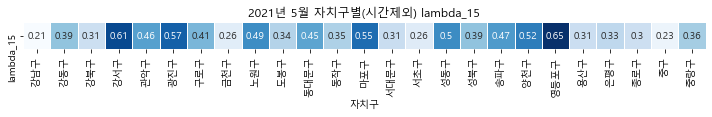

In [5]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_lambda, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 5월 자치구별(시간제외) lambda_15')
plt.tight_layout()
plt.show()

In [6]:
dft_pivot_lambda_std = df.pivot_table(index = ['자치구'], values = ['lambda_15'], aggfunc = 'std').T
dft_pivot_lambda_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
lambda_15,0.285385,0.494928,0.318932,0.762192,0.783912,1.012795,0.585593,0.381836,0.532241,0.368801,0.483038,0.488241,0.795809,0.375555,0.460719,0.743758,0.464311,0.62959,0.61642,0.99755,0.472512,0.48162,0.354624,0.278558,0.417022


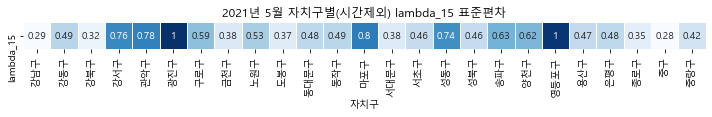

In [7]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_lambda_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 5월 자치구별(시간제외) lambda_15 표준편차')
plt.tight_layout()
plt.show()

In [8]:
dft_pivot_mu = df.pivot_table(index = ['자치구'], values = ['mu_15']).T
dft_pivot_mu.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
mu_15,0.216006,0.378832,0.30723,0.607802,0.463388,0.566184,0.412225,0.260316,0.49083,0.339201,0.44873,0.352017,0.550733,0.321324,0.265262,0.493777,0.389951,0.467334,0.515148,0.655891,0.306211,0.316842,0.324594,0.24896,0.350785


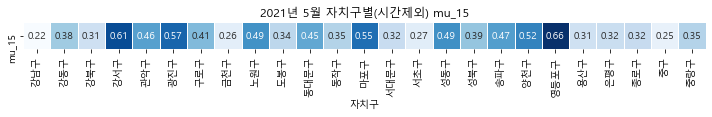

In [9]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_mu, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 5월 자치구별(시간제외) mu_15')
plt.tight_layout()
plt.show()

In [10]:
dft_pivot_mu_std = df.pivot_table(index = ['자치구'], values = ['mu_15'], aggfunc = 'std').T
dft_pivot_mu_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
mu_15,0.287668,0.463007,0.321097,0.75215,0.723855,0.897648,0.58622,0.380187,0.519935,0.340751,0.462768,0.423606,0.740122,0.335427,0.417298,0.722834,0.42133,0.631895,0.582898,0.978665,0.441196,0.407438,0.374193,0.303356,0.363661


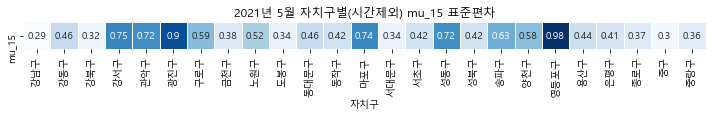

In [11]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_mu_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 5월 자치구별(시간제외) mu_15 표준편차')
plt.tight_layout()
plt.show()

In [12]:
dft_pivot_rho = df.pivot_table(index = ['자치구'], values = ['rho']).T
dft_pivot_rho.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
rho,1.12245,1.199829,1.238819,1.2797,1.116193,1.147491,1.323783,1.457698,1.238975,1.300428,1.257108,1.139678,1.228238,1.124289,1.074726,1.232786,1.125364,1.201314,1.190417,1.301157,1.193343,1.237151,1.016145,1.112159,1.205525


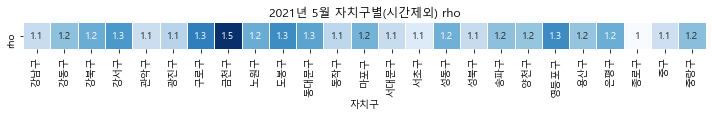

In [13]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_rho, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 5월 자치구별(시간제외) rho')
plt.tight_layout()
plt.show()

In [14]:
dft_pivot_L_s = df.pivot_table(index = ['자치구'], values = ['L_s']).T
dft_pivot_L_s.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
L_s,1.010383,2.073303,1.478707,3.542156,2.505526,3.417598,2.200987,1.223078,2.889378,1.932441,2.452744,2.001607,3.425175,1.620206,1.460634,3.076378,2.062875,2.660514,2.945938,4.106258,1.782147,1.84854,1.631533,1.120107,1.952543


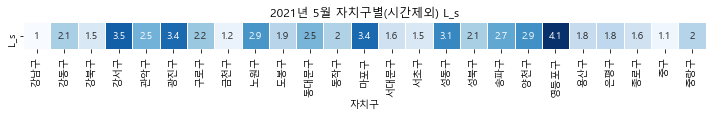

In [15]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_L_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 5월 자치구별(시간제외) L_s')
plt.tight_layout()
plt.show()

In [16]:
dft_pivot_L_s_std = df.pivot_table(index = ['자치구'], values = ['L_s'], aggfunc = 'std').T
dft_pivot_L_s_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
L_s,1.540208,2.59424,1.582856,4.174028,4.503329,7.928516,2.895229,1.869983,3.080195,2.268524,2.388623,3.037404,5.3844,1.894404,2.962361,4.60891,2.496957,3.575777,3.424583,6.446552,2.79567,3.016279,1.722372,1.256403,2.134154


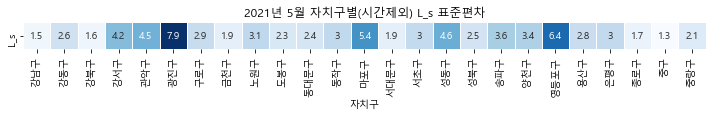

In [17]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_L_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 5월 자치구별(시간제외) L_s 표준편차')
plt.tight_layout()
plt.show()

In [18]:
dft_pivot_W_s = df.pivot_table(index = ['자치구'], values = ['W_s']).T
dft_pivot_W_s.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
W_s,16.221747,19.1804,14.506747,26.664083,15.851486,21.056102,23.429662,24.938726,24.220681,22.061374,21.50063,18.510129,28.994058,19.457459,19.550725,28.440786,15.433085,26.350798,26.406688,35.301361,23.167166,18.455715,24.622974,21.072699,18.774655


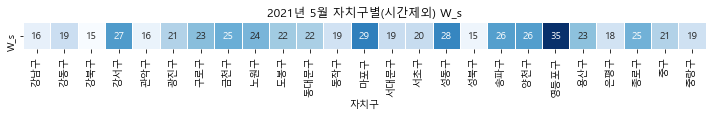

In [19]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_W_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 5월 자치구별(시간제외) W_s')
plt.tight_layout()
plt.show()

In [20]:
dft_pivot_W_s_std = df.pivot_table(index = ['자치구'], values = ['W_s'], aggfunc = 'std').T
dft_pivot_W_s_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
W_s,45.746963,45.476821,32.228701,80.162124,47.08119,56.276731,79.789655,92.41269,81.693018,63.144707,57.323957,55.145162,86.01658,53.310926,72.710055,100.870188,42.225461,82.687917,90.871177,108.916895,78.226701,48.949309,80.292254,57.777498,54.041653


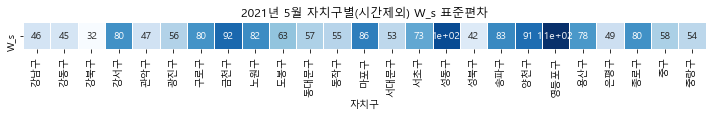

In [21]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_W_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 5월 자치구별(시간제외) W_s 표준편차')
plt.tight_layout()
plt.show()

# 자치구별 시간별

In [22]:
df_pivot_lambda = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['lambda_15'])
df_pivot_lambda.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.102402  0.073625  0.053029  0.035623  0.024948  0.018566  0.044384   
강동구  0.230857  0.152981  0.097589  0.055148  0.040893  0.064435  0.118361   
강북구  0.229301  0.158737  0.117070  0.081048  0.070027  0.059274  0.079167   
강서구  0.264202  0.167783  0.100223  0.061016  0.047474  0.070907  0.165804   
관악구  0.364801  0.226281  0.160223  0.107211  0.063567  0.061433  0.105669   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.131817  0.269378  0.205558  0.155721  0.182003  0.246461  0.260327   
강동구  0.249756  0.415526  0.276556  0.253747  0.310850  0.384327  0.435239   
강북구  0.157796  0.284005  0.208468  0.213978  0.261828  0.310618  0.325538   
강서구  0.443346  0.885930  0.495790  0.431173  0.515368  0.655813  0.679854   
관악구  0.201139  0.412595  0.280005  0.279530  0.332898  0.418762  0.470825   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.258297  0.275760  0.331922  0.429972  0.505744  0.412103  0.297807   
강동구  0.425301  0.476703  0.575269  0.690453  0.982079  0.870560  0.620886   
강북구  0.354301  0.405108  0.477419  0.533871  0.654839  0.629570  0.483333   
강서구  0.703895  0.777643  0.904189  1.189947  1.654697  1.295547  0.991580   
관악구  0.490157  0.534511  0.620493  0.788662  1.157495  1.028107  0.815821   

                                   
시간         21        22        23  
자치구                                
강남구  0.258297  0.237352  0.142957  
강동구  0.596204  0.620886  0.368687  
강북구  0.442204  0.459812  0.325134  
강서구  0.878982  0.849564  0.449128  
관악구  0.768738  0.820327  0.535697

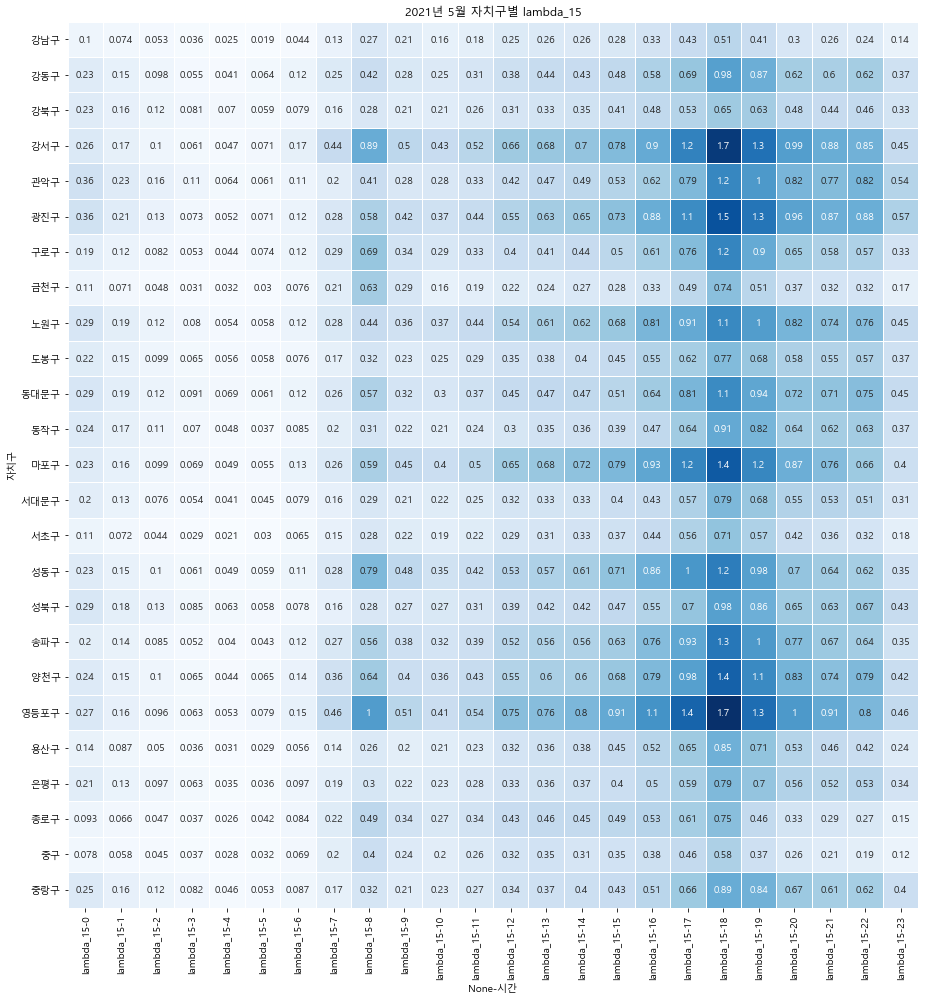

In [23]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_lambda, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 5월 자치구별 lambda_15')
plt.tight_layout()
plt.show()

In [24]:
df_pivot_lambda_std = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['lambda_15'], aggfunc = 'std')
df_pivot_lambda_std.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.103320  0.071704  0.051875  0.040925  0.029717  0.029136  0.069776   
강동구  0.227074  0.149275  0.105668  0.059960  0.054273  0.078877  0.183574   
강북구  0.165802  0.129446  0.097709  0.062263  0.071030  0.076576  0.131172   
강서구  0.213763  0.136894  0.094364  0.060421  0.055629  0.102102  0.276857   
관악구  0.417627  0.262236  0.180387  0.134224  0.075118  0.099952  0.156737   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.168984  0.345715  0.241386  0.148955  0.156717  0.206471  0.231642   
강동구  0.388318  0.542862  0.292936  0.234823  0.285861  0.340040  0.378741   
강북구  0.189074  0.293112  0.218844  0.190329  0.207455  0.243328  0.253722   
강서구  0.628497  1.124012  0.540418  0.409843  0.476221  0.545178  0.581144   
관악구  0.321930  0.628087  0.338061  0.333743  0.373790  0.489635  0.559688   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.244364  0.290493  0.369236  0.434564  0.515366  0.420567  0.322103   
강동구  0.371148  0.442698  0.503987  0.617824  0.910097  0.768756  0.530458   
강북구  0.283744  0.329533  0.374460  0.391823  0.468189  0.445073  0.348371   
강서구  0.580634  0.643678  0.759626  1.039964  1.362197  0.962436  0.753881   
관악구  0.627451  0.715482  0.822673  1.101097  1.632519  1.341993  1.111651   

                                   
시간         21        22        23  
자치구                                
강남구  0.281486  0.246986  0.139099  
강동구  0.514161  0.562713  0.325522  
강북구  0.322509  0.336009  0.231464  
강서구  0.647624  0.623715  0.341651  
관악구  0.998433  1.046228  0.639959

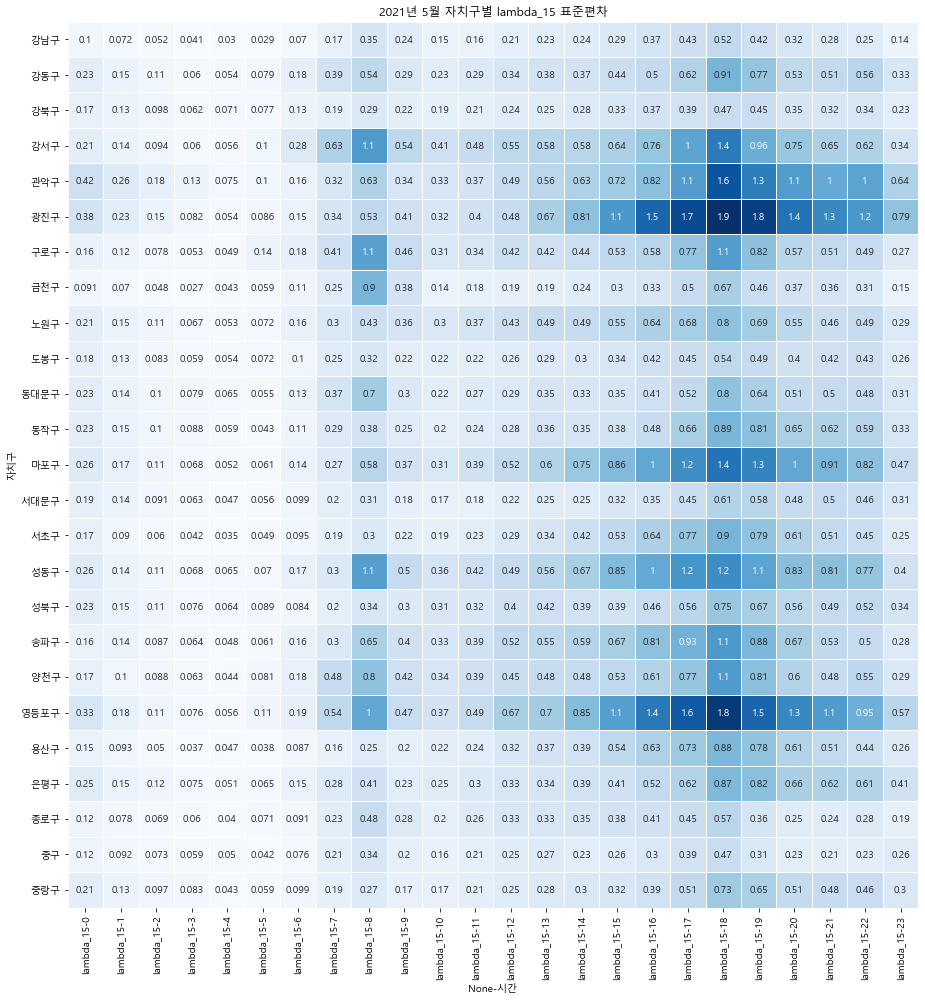

In [25]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_lambda_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 5월 자치구별 lambda_15 표준편차')
plt.tight_layout()
plt.show()

In [26]:
df_pivot_mu = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['mu_15'])
df_pivot_mu.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.087027  0.060803  0.046531  0.028777  0.021235  0.023497  0.057670   
강동구  0.175220  0.119909  0.070137  0.048713  0.037960  0.080727  0.154936   
강북구  0.207796  0.125000  0.096909  0.066935  0.058065  0.062231  0.096505   
강서구  0.214242  0.132329  0.082420  0.055691  0.046358  0.088456  0.193650   
관악구  0.289967  0.178605  0.140536  0.098197  0.062737  0.078629  0.144924   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.129728  0.226909  0.187340  0.170283  0.223950  0.251392  0.271931   
강동구  0.344086  0.473851  0.322092  0.293744  0.360785  0.429049  0.471733   
강북구  0.171774  0.264247  0.235753  0.244624  0.296909  0.328091  0.361425   
강서구  0.529519  0.880858  0.504007  0.473778  0.579783  0.699381  0.716271   
관악구  0.332661  0.516129  0.336338  0.340489  0.406784  0.505930  0.527158   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.278893  0.322523  0.398352  0.537712  0.604142  0.380831  0.290497   
강동구  0.461551  0.513767  0.595226  0.731427  0.879602  0.682551  0.564679   
강북구  0.388575  0.445027  0.508871  0.549059  0.688172  0.556855  0.477285   
강서구  0.743051  0.832471  0.965003  1.263289  1.647647  1.150132  0.915500   
관악구  0.551945  0.608752  0.678012  0.794829  1.042102  0.851874  0.778107   

                                   
시간         21        22        23  
자치구                                
강남구  0.260269  0.212636  0.111221  
강동구  0.546188  0.477680  0.256354  
강북구  0.466398  0.410887  0.266129  
강서구  0.823341  0.703135  0.346926  
관악구  0.746917  0.725925  0.383776

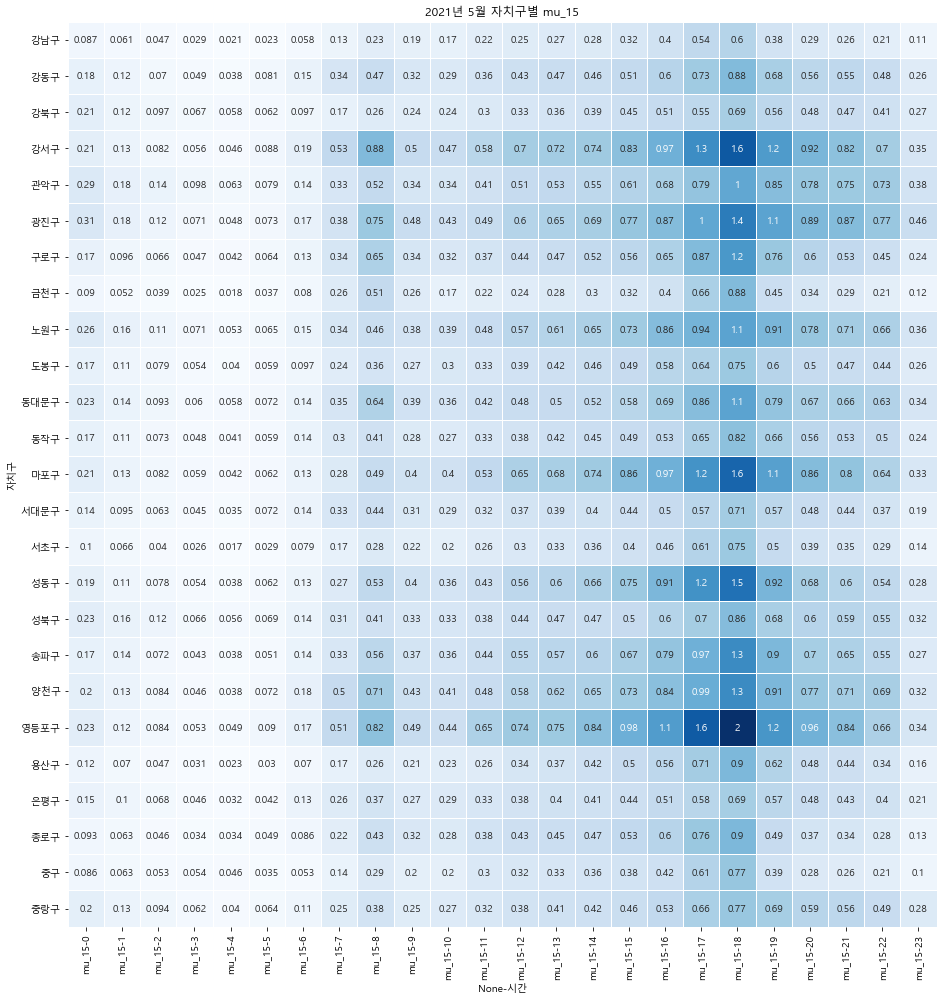

In [27]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_mu, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 5월 자치구별 mu_15')
plt.tight_layout()
plt.show()

In [28]:
df_pivot_mu_std = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['mu_15'], aggfunc = 'std')
df_pivot_mu_std.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.077932  0.051283  0.045706  0.031370  0.025486  0.038068  0.076826   
강동구  0.173951  0.126443  0.079705  0.057879  0.059332  0.108347  0.156115   
강북구  0.142528  0.102446  0.096563  0.069060  0.055353  0.077496  0.075008   
강서구  0.178517  0.122369  0.080781  0.056588  0.050883  0.090889  0.196252   
관악구  0.365239  0.200893  0.220699  0.154516  0.082464  0.097238  0.181005   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.150631  0.235922  0.158592  0.132004  0.168865  0.182938  0.224941   
강동구  0.300982  0.476694  0.293855  0.225983  0.305446  0.361263  0.388777   
강북구  0.120189  0.189627  0.154764  0.148611  0.200027  0.187905  0.240090   
강서구  0.500760  0.906966  0.408984  0.314453  0.400088  0.499310  0.542075   
관악구  0.419032  0.564126  0.383859  0.352255  0.429264  0.498280  0.565813   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.241711  0.294043  0.349918  0.497988  0.550253  0.379152  0.283832   
강동구  0.371196  0.436642  0.500272  0.673869  0.874127  0.658976  0.531250   
강북구  0.269811  0.325900  0.353059  0.407474  0.569618  0.467149  0.393148   
강서구  0.574462  0.652992  0.727888  1.050633  1.525490  1.061048  0.788449   
관악구  0.644026  0.748635  0.804285  0.997225  1.302485  1.166428  1.011539   

                                   
시간         21        22        23  
자치구                                
강남구  0.279083  0.209158  0.102789  
강동구  0.522189  0.441146  0.222888  
강북구  0.395096  0.333149  0.189427  
강서구  0.745000  0.570057  0.269212  
관악구  1.048331  1.065857  0.489401

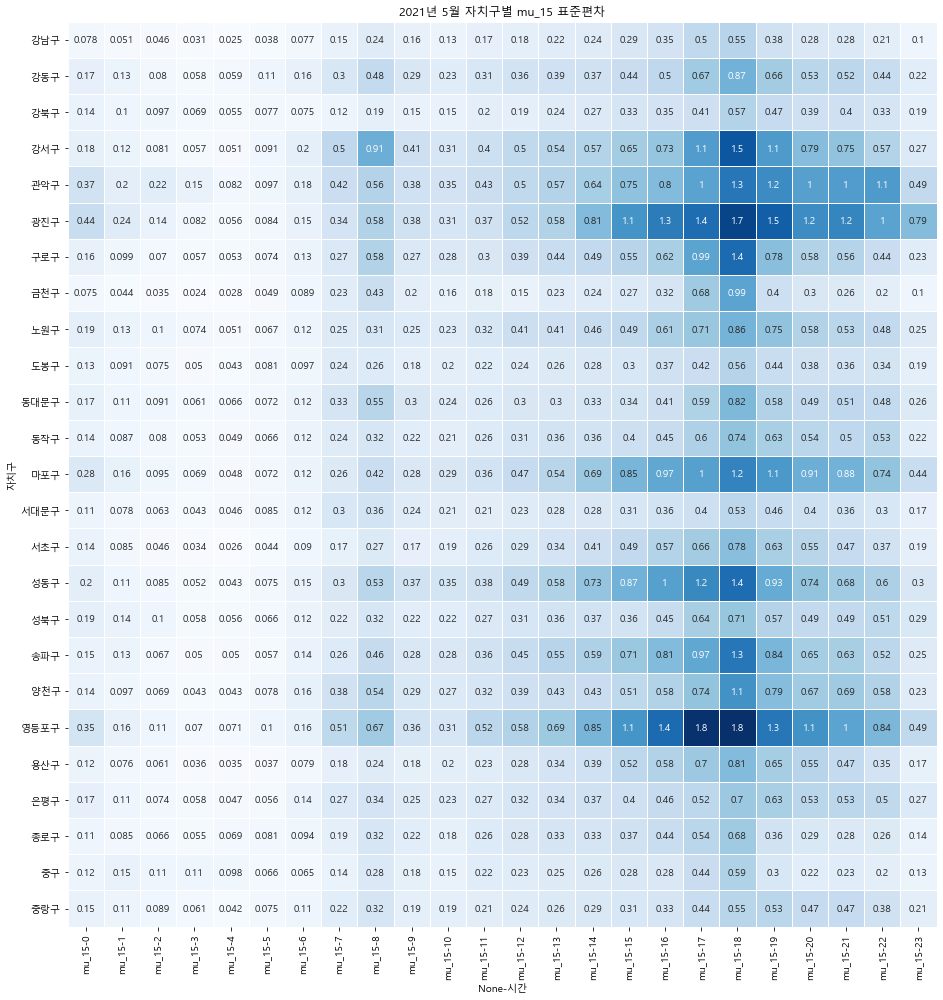

In [29]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_mu_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 5월 자치구별 mu_15 표준편차')
plt.tight_layout()
plt.show()

In [30]:
df_pivot_rho = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['rho'])
df_pivot_rho.head()

rho                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  1.308893  1.368516  1.346861  1.092344  0.882938  0.737750  1.202534   
강동구  1.418213  1.543684  1.519206  1.409439  1.068455  1.536332  1.187750   
강북구  1.542410  1.848724  1.822417  2.260547  1.415739  1.403483  1.213171   
강서구  1.509024  1.605241  1.402341  1.160556  1.311590  1.626641  1.813126   
관악구  1.356427  1.210224  1.585093  1.344662  1.346843  1.351455  1.647460   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  1.546402  1.825957  1.420106  1.005739  0.911517  0.961204  0.970951   
강동구  1.024976  1.077402  0.988359  0.865062  0.908645  0.906028  0.998103   
강북구  1.248734  1.396043  0.967128  0.907438  0.885086  0.899265  0.860730   
강서구  1.786140  1.894500  1.268977  0.928917  0.858833  0.908608  0.973826   
관악구  1.190364  0.943398  0.961768  0.854608  0.894778  0.818800  0.822811   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.952572  0.817509  0.821808  0.832356  0.938568  1.148135  1.014842   
강동구  0.943599  0.956468  0.966251  0.989517  1.220003  1.468372  1.241255   
강북구  0.892117  0.873903  0.911409  0.984654  1.051278  1.294803  1.175999   
강서구  0.923529  0.922718  0.959435  0.996978  1.116998  1.227535  1.184248   
관악구  0.842013  0.829574  0.838753  0.929358  1.036322  1.237677  1.000692   

                                   
시간         21        22        23  
자치구                                
강남구  1.064687  1.290322  1.476299  
강동구  1.331409  1.587389  1.639971  
강북구  1.114890  1.408943  1.352749  
강서구  1.383821  1.499331  1.449884  
관악구  1.069860  1.178657  1.497038

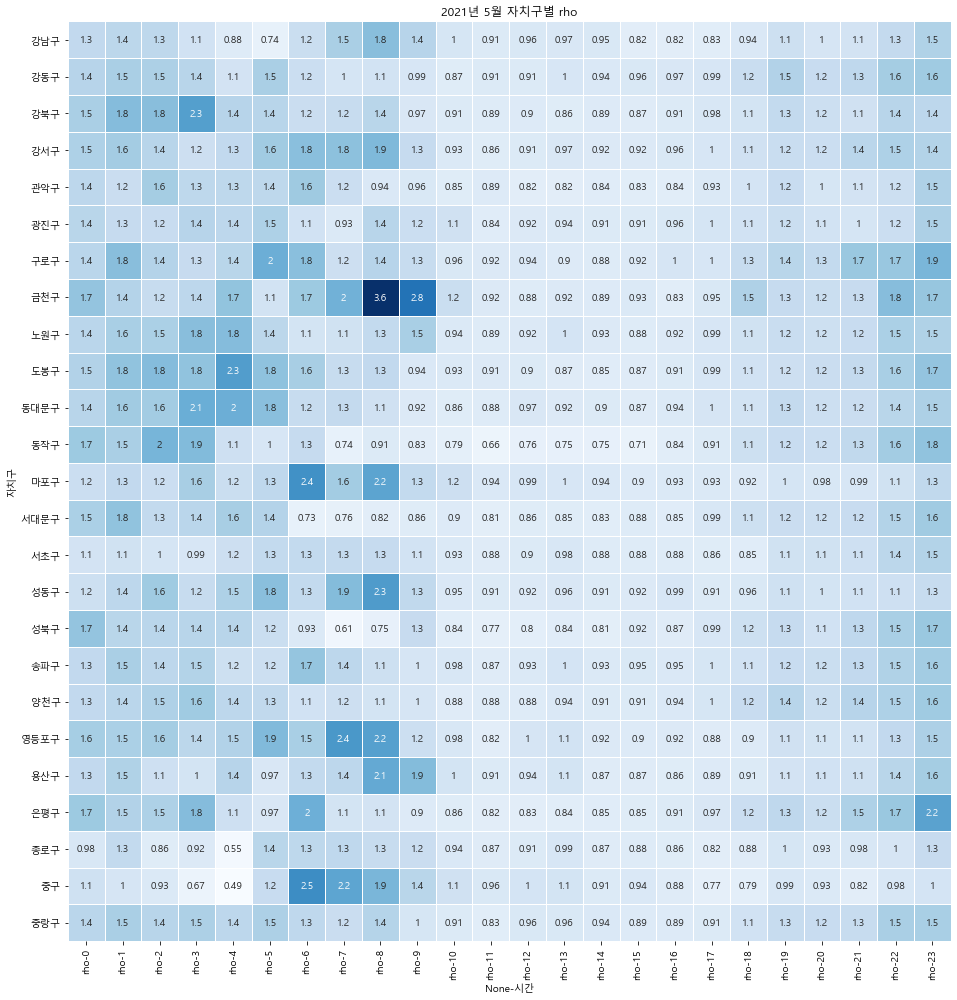

In [31]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_rho, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 5월 자치구별 rho')
plt.tight_layout()
plt.show()

In [32]:
df_pivot_L_s = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['L_s'])
df_pivot_L_s.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  1.186684  1.196769  1.050145  1.006443  0.824283  0.524176  0.853123   
강동구  2.720127  2.457694  2.506682  2.285302  1.978694  1.621795  1.610465   
강북구  1.589533  1.490385  1.699166  1.533124  1.432588  1.191936  1.345663   
강서구  3.861791  4.029931  3.707343  3.526789  3.269729  3.185443  3.159384   
관악구  3.332100  3.643466  3.001981  2.543109  2.453499  2.265848  1.764216   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  1.070936  1.171003  1.084943  0.997402  0.925047  1.098547  1.022786   
강동구  1.454243  1.628538  1.684473  1.769062  1.682937  1.771692  1.816559   
강북구  1.431850  1.643928  1.470243  1.463409  1.418506  1.480187  1.385728   
강서구  2.914411  2.889818  3.167621  3.313310  3.279777  3.389703  3.442418   
관악구  1.513893  1.986422  1.848629  1.703789  1.725794  2.009827  2.258436   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  1.012240  0.935229  0.957119  0.920472  0.926569  1.104844  1.072814   
강동구  1.876315  1.914885  2.098691  2.127129  2.374516  2.632061  2.241342   
강북구  1.398032  1.430844  1.472189  1.456308  1.417128  1.635443  1.472450   
강서구  3.490137  3.412703  3.501504  3.863663  3.844901  4.034024  3.936944   
관악구  2.100113  2.040018  2.483816  2.890823  3.154152  3.418116  3.090045   

                                   
시간         21        22        23  
자치구                                
강남구  0.999987  1.081589  1.226041  
강동구  2.238361  2.523649  2.744065  
강북구  1.355477  1.576784  1.698062  
강서구  3.664901  3.982448  4.143046  
관악구  2.513773  2.753151  3.637616

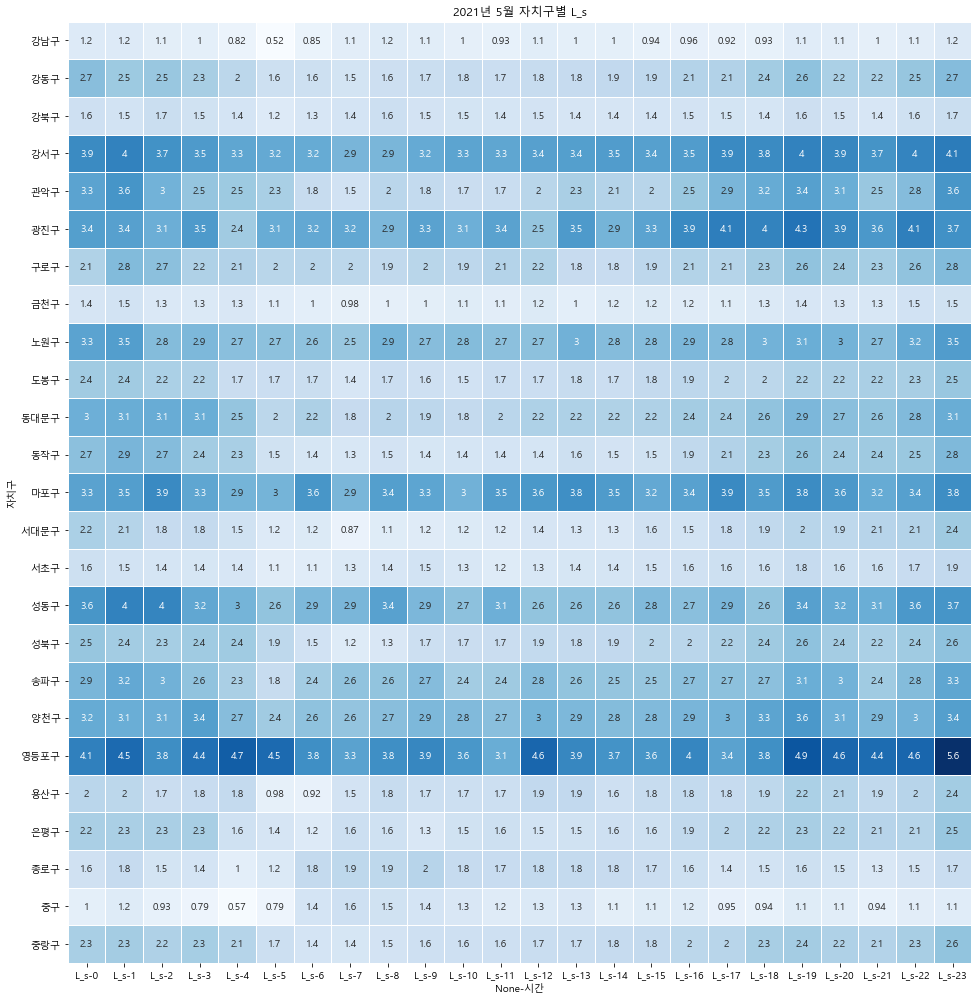

In [33]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_L_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 5월 자치구별 L_s')
plt.tight_layout()
plt.show()

In [34]:
df_pivot_L_s_std = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['L_s'], aggfunc = 'std')
df_pivot_L_s_std.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  1.688143  1.979440  1.456723  1.872383  1.361920  1.124563  1.560554   
강동구  3.172943  2.907775  3.172429  2.935920  3.226711  2.805459  2.799670   
강북구  1.638642  1.327874  1.788825  1.608909  1.536973  1.615962  2.178737   
강서구  3.644396  3.930929  4.197340  4.798783  5.001998  5.534017  5.590465   
관악구  5.064147  6.197143  4.934610  4.724275  4.081353  6.274521  3.564619   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  1.911934  1.941836  1.781314  1.493386  1.252695  1.690302  1.376049   
강동구  2.356330  2.449660  2.118292  2.403766  1.894363  1.790591  1.965595   
강북구  2.116461  2.113466  1.944992  1.819977  1.599066  1.600216  1.317299   
강서구  4.662700  4.151865  4.641533  4.773942  4.359272  3.837190  3.735601   
관악구  3.558185  4.146232  2.905322  2.632883  2.595730  3.565991  3.657839   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  1.366712  1.146264  1.424085  1.366529  1.273861  1.420344  1.530682   
강동구  2.106900  2.130922  2.230669  2.418749  2.654732  2.856050  2.382100   
강북구  1.374231  1.327373  1.420272  1.260101  1.235767  1.416540  1.313932   
강서구  3.597044  3.261618  3.663270  4.107079  3.514400  3.397877  3.550325   
관악구  2.963342  2.626715  4.412976  5.643110  5.936721  5.739212  5.217516   

                                   
시간         21        22        23  
자치구                                
강남구  1.212733  1.393544  1.802982  
강동구  2.427260  2.828503  3.024193  
강북구  1.131755  1.311007  1.554307  
강서구  3.338482  3.806981  3.790196  
관악구  3.520302  3.479432  6.290987

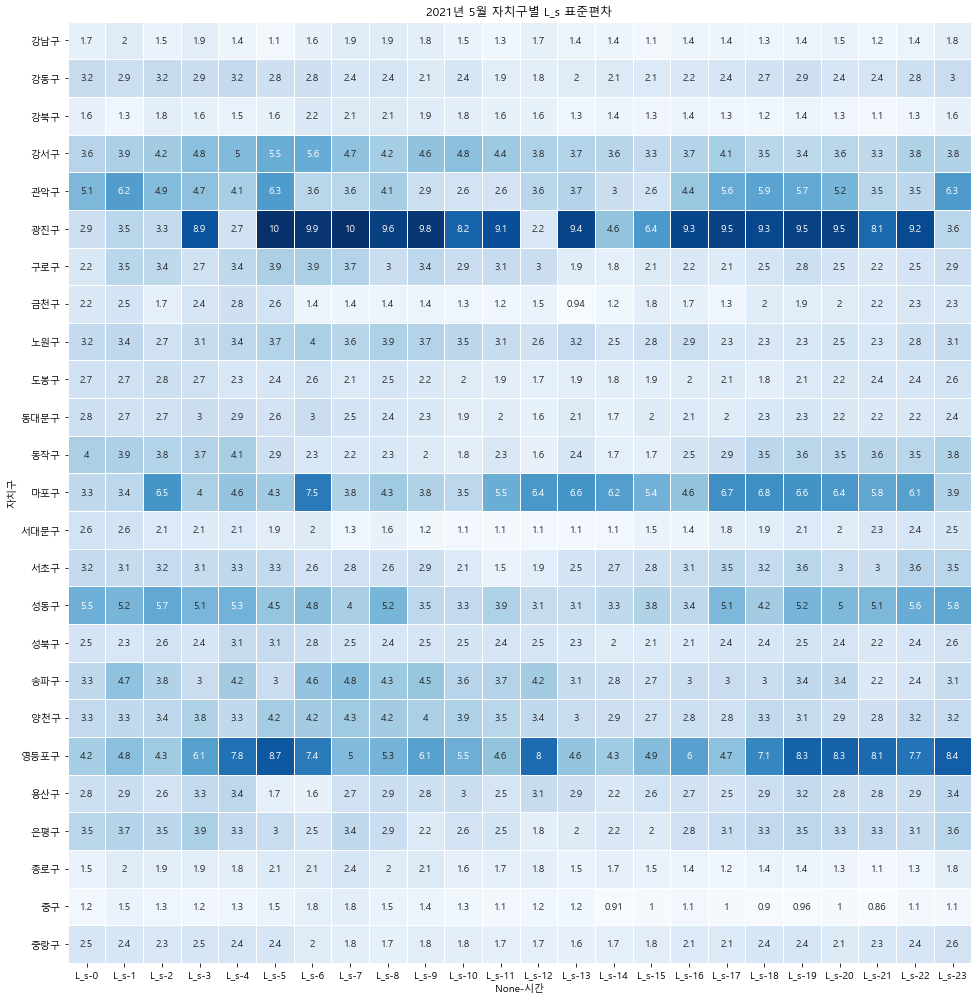

In [35]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_L_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 5월 자치구별 L_s 표준편차')
plt.tight_layout()
plt.show()

In [36]:
df_pivot_W_s = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['W_s'])
df_pivot_W_s.head()

W_s                                                          \
시간          0          1          2          3           4          5    
자치구                                                                      
강남구  21.002513  29.543990  38.532528  52.941310   55.049450  43.890248   
강동구  21.893422  32.982450  54.513659  71.087470   84.880136  55.732258   
강북구  10.704101  18.544897  33.257694  49.694886   50.126321  48.304383   
강서구  28.350928  57.727141  74.264550  93.778160  122.629332  90.419002   
관악구  12.338951  20.214979  34.091322  41.050198   74.233155  55.816602   

                                                                              \
시간          6          7          8         9         10        11        12   
자치구                                                                            
강남구  37.040787  18.524857   9.703438  9.099885  8.466300  6.443620  5.015801   
강동구  24.288198   8.743490   6.764408  9.558112  8.503155  7.443269  5.910060   
강북구  30.000899  15.795596  10.157908  9.005995  8.262488  6.699215  5.698504   
강서구  53.567759  14.025941   6.496340  9.689875  8.769769  6.806792  5.568158   
관악구  42.451233  17.516680   6.491741  8.789986  7.312688  5.965190  4.571755   

                                                                           \
시간         13        14        15        16        17        18        19   
자치구                                                                         
강남구  4.697958  4.578388  3.779766  3.165893  2.402148  2.111190  3.439124   
강동구  5.643223  5.635086  5.302817  4.531901  4.080209  3.990208  5.049496   
강북구  5.085023  5.014621  4.338508  3.936380  3.598998  3.109702  3.893680   
강서구  5.636647  5.627426  4.946688  4.273295  3.713648  3.182573  4.511095   
관악구  4.742410  4.628894  4.488139  3.856003  3.755741  2.924005  3.839581   

                                              
시간         20        21        22         23  
자치구                                           
강남구  4.611002  5.483934  6.545062  13.252729  
강동구  5.632896  6.799224  7.738745  13.625710  
강북구  4.437629  4.645865  5.829550   8.019091  
강서구  5.875875  6.996774  8.008354  15.071859  
관악구  3.921511  4.268245  4.497311   8.669344

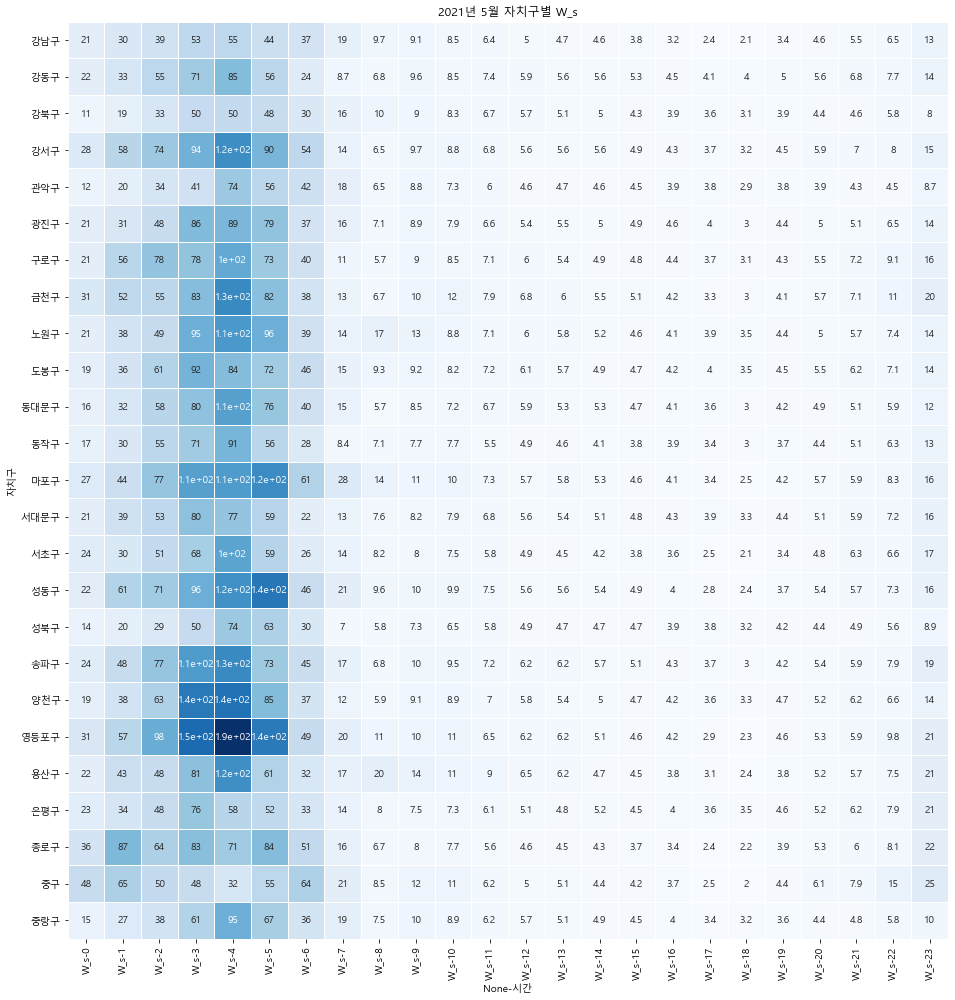

In [37]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_W_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 5월 자치구별 W_s')
plt.tight_layout()
plt.show()

In [38]:
df_pivot_W_s_std = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['W_s'], aggfunc = 'std')
df_pivot_W_s_std.head()

W_s                                                            \
시간          0          1          2           3           4           5    
자치구                                                                        
강남구  30.921817  44.173333  61.525144   86.785138  110.960155   94.537463   
강동구  20.548439  29.408962  56.135205   87.645197  124.195978   92.483914   
강북구   8.256962  14.207877  39.269946   72.245180   64.218134   73.591905   
강서구  31.351617  91.822243  91.409914  133.876878  186.307539  167.432846   
관악구  11.404237  18.681951  48.290258   62.517568  139.632249   97.333130   

                                                                       \
시간           6          7          8          9         10         11   
자치구                                                                     
강남구   80.759604  29.645996  16.161244  13.631833  9.060393  11.294813   
강동구   28.138027  10.246123   6.221124   8.082285  5.901123   5.726189   
강북구   48.929992  16.978290  13.810634   7.185485  6.334305   4.052212   
강서구  163.307293  26.554019   9.575047  14.064298  8.285308   5.595052   
관악구   86.100362  42.796873   7.743590   9.030431  5.699979   4.155975   

                                                                           \
시간         12        13        14        15        16        17        18   
자치구                                                                         
강남구  3.810678  3.574407  3.459228  2.676712  2.439591  1.918436  1.667076   
강동구  2.889823  3.843271  2.971509  3.470037  2.249467  2.369704  3.026963   
강북구  3.308194  2.491734  2.951749  2.336687  2.364726  1.829430  1.986856   
강서구  3.201077  3.149005  2.997632  2.656049  2.329646  2.107896  2.070828   
관악구  2.947338  2.834413  2.875975  2.923170  2.121811  2.237178  1.806887   

                                                        
시간         19        20        21        22         23  
자치구                                                     
강남구  2.403543  3.625927  6.279565  5.916944  14.533732  
강동구  3.962489  3.727431  6.320702  6.432370  10.870872  
강북구  2.102263  2.641183  3.006376  4.176214   5.726692  
강서구  2.741360  4.781653  6.375666  7.080611  11.312883  
관악구  2.253770  2.394514  3.185213  3.283597   6.334066

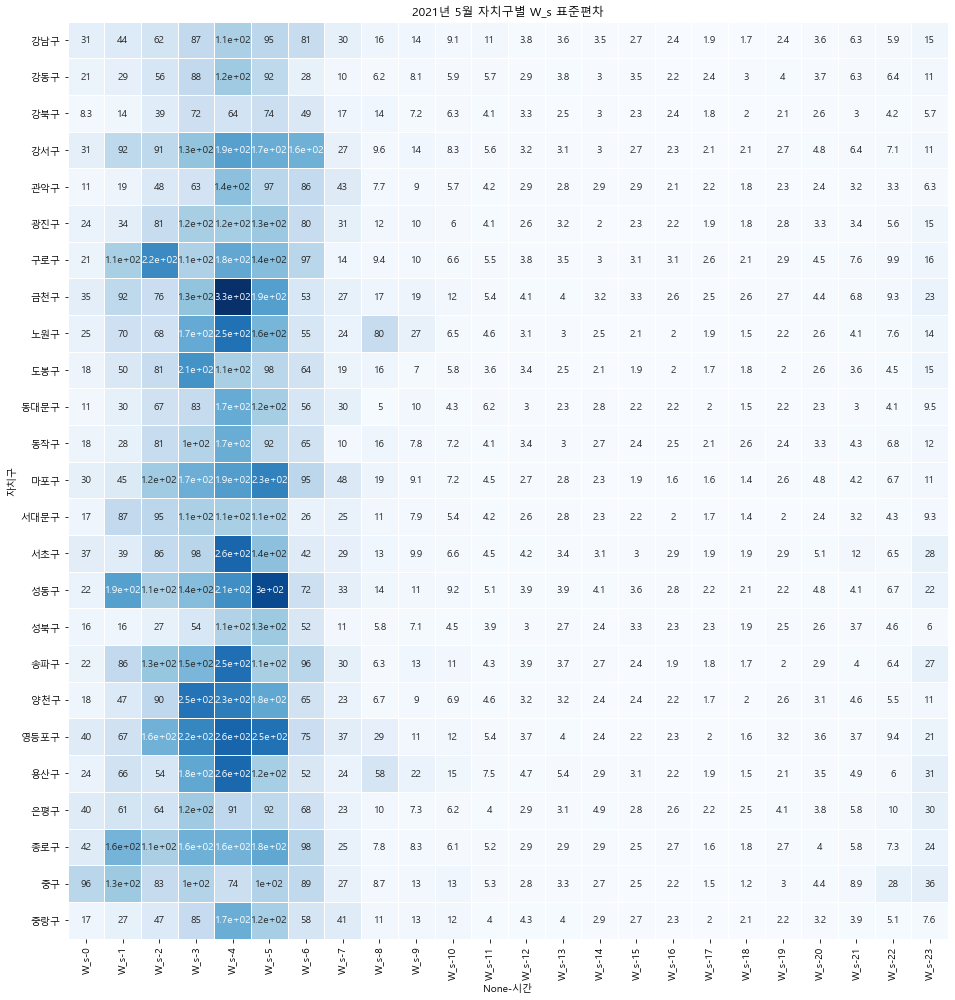

In [39]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_W_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 5월 자치구별 W_s 표준편차')
plt.tight_layout()
plt.show()

# 학교/ 아파트/ 지하철역/공원 근처 대여소 분석

In [40]:
s = pd.DataFrame(df['대여소명'].unique()).rename(columns = {0 : 'station'})
s

,station
0,(구)신한은행 중랑교지점
1,(시립)고덕평생학습관
2,(재)FITI시험연구원
3,3호선 매봉역 3번출구앞
4,419민주묘지 입구사거리
...,...
2379,흑석한강푸르지오(110동)
2380,흥국사 정류장
2381,희성오피앙
2382,희훈타워빌 앞


In [41]:
school = []
subway = []
apart = []
park = []
for i in range(len(s)):
    if '출구' in s['station'][i]:
        subway.append(s['station'][i])
    elif '학교' in s['station'][i]:
        school.append(s['station'][i])
    elif '아파트' in s['station'][i]:
        apart.append(s['station'][i]) 
    elif '공원' in s['station'][i]:
        park.append(s['station'][i])

In [42]:
school

['KC 대학교',
 '가락고등학교 앞',
 '가락중학교 앞',
 '가재울 초등학교',
 '강남중학교 앞',
 '강동경희대학교병원 입구',
 '강북중학교 앞',
 '강서공업고등학교 앞',
 '강서초등학교',
 '개포고등학교 정문앞',
 '거여초등학교 옆',
 '건국대학교 (입학정보관)',
 '건국대학교 (행정관)',
 '건국대학교 과학관(이과대) 앞',
 '건국대학교 정문 앞',
 '건국대학교 학생회관',
 '경기여자고등학교 후문 (삼성로3길 입구)',
 '경문고등학교 앞',
 '경일중학교 앞',
 '경희대학교 청운관',
 '고덕초등학교',
 '공항중학교 버스정류장',
 '공항중학교앞',
 '공항초등학교건너편',
 '광남중학교',
 '광양중학교 앞',
 '광운대학교 중앙도서관',
 '광운초등학교 앞',
 '구로중학교앞',
 '구암초등학교 버스정류장',
 '구일고등학교 정문',
 '노원 을지대학교 병원',
 '노일초등학교 앞',
 '답십리초등학교 앞(현대시장 옆)',
 '답십리초등학교 옆 공원',
 '대광고등학교',
 '대진고등학교',
 '도봉고등학교 맞은편',
 '독산고등학교',
 '동대문중학교 옆',
 '동성중학교 앞',
 '동양미래대학교 정문 옆',
 '마곡엠밸리6_7단지 마곡중학교',
 '마곡중학교 후문',
 '면목초등학교',
 '명지대학교 도서관',
 '명지전문대학교 정문 앞',
 '모두의학교',
 '묘곡초등학교',
 '문정중학교',
 '문현중고등학교 사이',
 '밀알학교 입구 (삼성서울병원 입구)',
 '반포중학교 앞(세화여고 맞은편)',
 '방이초등학교',
 '방학중학교 앞',
 '배명고등학교',
 '백석예술대학교 제3캠퍼스 앞',
 '보성중고등학교 후문 앞',
 '북가좌 초등학교',
 '불암고등학교 앞 횡단보도',
 '사당중학교 버스정류소',
 '삼일초등학교 인근',
 '상계중학교(당현2교사거리)',
 '상신초등학교앞 버스정류장',
 '상암월드컵파크5단지(상암중학교)',
 '상암중학교 옆',
 '상일초등학교',
 '새솔초등학교',
 '서울강월초등학

In [43]:
len(school)

146

In [44]:
school_data = []
for i in range(len(df)):
    if df['대여소명'][i] in school:
        school_data.append(df.loc[i])
school_data = pd.DataFrame(school_data)
school_data['특성'] = '학교'
school_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
984,강서구,KC 대학교,0,0.088710,0.008065,11.000000,0.916667,124.000000,학교
985,강서구,KC 대학교,1,0.185484,0.040323,4.600000,0.821429,24.800000,학교
986,강서구,KC 대학교,2,0.016129,0.000000,0.000000,0.000000,0.000000,학교
987,강서구,KC 대학교,3,0.008065,0.016129,0.500000,0.333333,62.000000,학교
988,강서구,KC 대학교,4,0.088710,0.000000,0.000000,0.000000,0.000000,학교
...,...,...,...,...,...,...,...,...,...
57043,동대문구,휘봉고등학교 앞,19,0.540323,0.395161,1.367347,1.205249,3.992259,학교
57044,동대문구,휘봉고등학교 앞,20,0.258065,0.282258,0.914286,0.940338,5.234968,학교
57045,동대문구,휘봉고등학교 앞,21,0.379032,0.225806,1.678571,1.330703,7.203810,학교
57046,동대문구,휘봉고등학교 앞,22,0.629032,0.201613,3.120000,1.630442,8.716117,학교


In [45]:
subway

['3호선 매봉역 3번출구앞',
 '419민주묘지역 1번출구',
 '7호선 이수역7번출구',
 '9호선종합운동장역 9번출구',
 'DMC역 2번출구 옆',
 'DMC역 9번출구 앞',
 'DMC역7번출구',
 '가락시장역 2번 출구',
 '가락시장역 3번 출구',
 '가로공원공영주차장 1번 출구',
 '가산디지털단지 7번출구',
 '가양역 8번출구',
 '가좌역 4번출구 앞',
 '가좌역1 번출구 뒤',
 '강남구청역 2번출구 뒤',
 '강남파이낸스센터앞(역삼역2번출구)',
 '강동역 1번출구 앞',
 '강동역3번출구',
 '강변역 4번출구 뒤',
 '개봉역 1번 출구 자전거보관서쪽',
 '개화산역 2번 출구',
 '거여역 3번출구',
 '거여역 8번출구 뒤',
 '건대입구역 5번출구 뒤',
 '경복궁역 4번출구 뒤',
 '경복궁역 7번출구 앞',
 '경찰병원역 1,2번 출구 사이',
 '경찰병원역 3번출구 앞',
 '고덕역 4번출구',
 '고덕역 5번출구',
 '고려대학교 2번출구',
 '고속터미널역 3번출구',
 '고속터미널역 5번출구 앞',
 '고속터미널역 8-1번, 8-2번 출구 사이',
 '공덕역 2번출구',
 '공덕역 5번출구',
 '공덕역 8번출구',
 '공릉역 1번 출구 앞',
 '공항시장역 2번출구 뒤',
 '공항시장역 4번출구',
 '광나루역 3번 출구',
 '광화문역 1번출구 앞',
 '광화문역 5번출구',
 '광화문역 6번출구 옆',
 '광화문역 7번출구 앞',
 '광흥창역 2번출구 앞',
 '광흥창역5번출구',
 '교대역 5번출구뒤',
 '교대역 6번출구',
 '교보타워 버스정류장(신논현역 3번출구 후면)',
 '구산역 2번 출구',
 '구산역 4번출구',
 '구파발역 2번출구',
 '국회의사당역 3번출구 옆',
 '국회의사당역 5번출구 옆',
 '군자역 7번출구 베스트샵 앞',
 '군자역 7번출구뒤',
 '군자역2번출구',
 '금호역 1번출구 앞',
 '금호역 3번출구',
 '길음역 3번출구 뒤',
 '까치산역 3번 출구',
 '낙성대

In [46]:
len(subway)

440

In [47]:
subway_data = []
for i in range(len(df)):
    if df['대여소명'][i] in subway:
        subway_data.append(df.loc[i])
subway_data = pd.DataFrame(subway_data)
subway_data['특성'] = '지하철'
subway_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
72,강남구,3호선 매봉역 3번출구앞,0,0.250000,0.112903,2.214286,4.227810,37.839471,지하철
73,강남구,3호선 매봉역 3번출구앞,1,0.048387,0.112903,0.428571,0.712590,14.850312,지하철
74,강남구,3호선 매봉역 3번출구앞,2,0.040323,0.048387,0.833333,1.978828,54.570487,지하철
75,강남구,3호선 매봉역 3번출구앞,3,0.008065,0.040323,0.200000,0.249616,30.960307,지하철
76,강남구,3호선 매봉역 3번출구앞,4,0.024194,0.032258,0.750000,1.700921,75.773367,지하철
...,...,...,...,...,...,...,...,...,...
57163,동작구,흑석역 4번출구,19,0.588710,0.403226,1.460000,1.246450,3.951870,지하철
57164,동작구,흑석역 4번출구,20,0.411290,0.330645,1.243902,1.144359,4.700954,지하철
57165,동작구,흑석역 4번출구,21,0.387097,0.330645,1.170732,1.104653,4.655522,지하철
57166,동작구,흑석역 4번출구,22,0.500000,0.346774,1.441860,1.238665,4.586489,지하철


In [48]:
apart

['DMC센트럴아이파크아파트',
 'DMC엘가아파트 앞',
 'ESA아파트 상가 앞',
 'LG한강 자이아파트 앞',
 'LIGA 아파트 앞',
 'LIG강촌아파트 103동앞',
 'e 편한세상 보문아파트 내',
 '가락미륭아파트 앞',
 '가락삼환아파트 앞',
 '가락쌍용2차아파트 103동',
 '강남한양수자인아파트',
 '강동롯데캐슬퍼스트 아파트(관리동)',
 '강동리버스트4단지아파트 404동 앞',
 '강동리버스트4단지아파트 405동 앞',
 '강변아파트 310동 앞',
 '개봉아이파크아파트 앞',
 '개봉푸르지오아파트 상가',
 '개포1단지아파트 입구 (보도육교)',
 '개포래미안포레스트아파트 107동 앞',
 '개포우성6차아파트 정문 앞',
 '거여동 어울림아파트  102동앞',
 '건영아파트 앞',
 '건영아파트앞 사거리',
 '고덕동 아남아파트',
 '고척LIGA아파트 앞',
 '공릉1단지아파트',
 '공릉동풍림아파트 101동',
 '공릉풍림아파트 108동',
 '구로동롯데아파트',
 '구룡마을 입구 (래미안블레스티지 아파트)',
 '구룡초사거리 (현대아파트10동 앞 )',
 '구룡터널 입구(개포1단지아파트)',
 '구의7단지현대아파트',
 '그랜드아이파크아파트 앞',
 '극동늘푸른아파트',
 '금강수목원아파트 앞',
 '금호 어울림 아파트 앞',
 '길성그랑프리텔아파트',
 '길음뉴타운푸르지오아파트 3단지',
 '길음래미안아파트817동 상가 앞',
 '꿈의숲 SK뷰 아파트',
 '낙성대 교수아파트',
 '남산타운아파트 버스정류장',
 '다성이즈빌아파트(호원대 대각선 맞은편)',
 '답십리 래미안엘파인아파트 입구',
 '답십리파크자이아파트 앞',
 '대림경동아파트앞',
 '대림아파트 사거리',
 '대림아파트 후문 상가 옆',
 '대성유니드아파트',
 '대호프라자아파트',
 '도곡동 경남아파트 건너편',
 '도봉한신아파트 주변',
 '돈암삼성풍림아파트',
 '동대문롯데캐슬아파트 앞',
 '동성1,2차 아파트 앞',
 '동신아파트 104동 앞',
 '

In [49]:
len(apart)

225

In [50]:
apart_data = []
for i in range(len(df)):
    if df['대여소명'][i] in apart:
        apart_data.append(df.loc[i])
apart_data = pd.DataFrame(apart_data)
apart_data['특성'] = '아파트'
apart_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
456,서대문구,DMC센트럴아이파크아파트,0,0.419355,0.403226,1.040000,2.614285,7.634405,아파트
457,서대문구,DMC센트럴아이파크아파트,1,0.298387,0.201613,1.480000,3.547634,18.531693,아파트
458,서대문구,DMC센트럴아이파크아파트,2,0.193548,0.096774,2.000000,4.095238,43.000000,아파트
459,서대문구,DMC센트럴아이파크아파트,3,0.096774,0.080645,1.200000,3.021172,41.657708,아파트
460,서대문구,DMC센트럴아이파크아파트,4,0.032258,0.040323,0.800000,1.868332,63.564017,아파트
...,...,...,...,...,...,...,...,...,...
56947,동대문구,휘경sk뷰아파트 앞,19,0.645161,0.572581,1.126761,1.648585,3.631587,아파트
56948,동대문구,휘경sk뷰아파트 앞,20,0.483871,0.451613,1.071429,1.586125,4.530337,아파트
56949,동대문구,휘경sk뷰아파트 앞,21,0.387097,0.395161,0.979592,1.474229,5.026441,아파트
56950,동대문구,휘경sk뷰아파트 앞,22,0.403226,0.274194,1.470588,1.962853,8.209287,아파트


In [51]:
park

['가온문화공원',
 '강일 다솜 어린이 공원',
 '계남공원 입구 주출입구 좌측',
 '고척근린공원 고척도서관 앞',
 '구로리공원',
 '구룡근린공원',
 '구의공원(테크노마트 앞)',
 '국립중앙박물관 -용산가족공원 앞',
 '궁동생태공원',
 '금암 문화공원',
 '금천폭포공원 앞',
 '길음8골어린이공원 옆',
 '꿈돌이공원 앞',
 '나들목공원',
 '낙성대공원',
 '남산공원 야외식물원 앞',
 '내곡3단지 어린이공원 앞',
 '노들나루공원 입구',
 '노량진근린공원',
 '노량진근린공원 대방공원',
 '노해근린공원내',
 '늘푸른공원 앞',
 '능골근린공원',
 '다락원체육공원 전망대 입구',
 '다산 어린이공원',
 '달맞이공원',
 '당고개공원 대여소',
 '당현천근린공원',
 '대학로 마로니에공원',
 '독립문 어린이 공원',
 '독산근린공원 입구',
 '동명근린공원 진입로 (아리수로)',
 '동인오피스텔 건너편 소공원',
 '뒷벌공원 옆',
 '등나무 근린공원(시립북서울미술관 앞)',
 '마곡문화공원',
 '마포 신수공원 앞',
 '마포어린이공원',
 '만해공원',
 '말우물 어린이 공원',
 '명일근린공원공동체텃밭',
 '목마공원',
 '목월공원 앞',
 '문배어린이공원 앞',
 '문정근린공원2',
 '문정동 근린공원',
 '문정동 글샘 공원',
 '문화촌 공원',
 '미래사랑어린이공원 앞',
 '방화근린공원',
 '백토공원 앞',
 '볏골공원',
 '보라매공원 보도육교',
 '보라매공원 정문',
 '부엉이공원 앞',
 '북한산생태공원입구(교통섬)',
 '사육신공원앞',
 '사평리 공원',
 '삼성도로공원',
 '삼청공원 앞',
 '상계근린공원 운동장 앞',
 '상림마을 생태공원',
 '샛강생태공원방문자센터 앞',
 '샛마을 근린공원',
 '생태공원앞 교차로(조명탑)',
 '서강나루 공원',
 '서남환경공원 버스정류장',
 '서래공원 앞',
 '서소문역사공원',
 '석촌호수교차로 (송파나루근린공원 앞)',
 '섬들근린공원',
 '세종로공

In [52]:
len(park)

121

In [53]:
park_data = []
for i in range(len(df)):
    if df['대여소명'][i] in park:
        park_data.append(df.loc[i])
park_data = pd.DataFrame(park_data)
park_data['특성'] = '공원'
park_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
2880,마포구,가온문화공원,0,0.048387,0.032258,1.500000,3.577444,116.507109,공원
2881,마포구,가온문화공원,1,0.008065,0.032258,0.250000,0.331868,41.181818,공원
2882,마포구,가온문화공원,2,0.008065,0.000000,0.000000,0.000000,0.000000,공원
2883,마포구,가온문화공원,3,0.000000,0.024194,0.000000,0.000000,0.000000,공원
2884,마포구,가온문화공원,4,0.008065,0.016129,0.500000,0.904762,114.000000,공원
...,...,...,...,...,...,...,...,...,...
56851,중구,훈련원공원주차장 앞,19,0.629032,0.524194,1.200000,1.725782,4.045985,공원
56852,중구,훈련원공원주차장 앞,20,0.403226,0.500000,0.806452,1.234575,3.715375,공원
56853,중구,훈련원공원주차장 앞,21,0.451613,0.500000,0.903226,1.373144,3.864524,공원
56854,중구,훈련원공원주차장 앞,22,0.379032,0.588710,0.643836,0.977764,2.914105,공원


In [54]:
data = pd.merge(school_data, subway_data, on=['특성', '자치구', '대여소명', '시간', 'lambda_15', 'mu_15', 'rho', 'L_s', 'W_s'], how = 'outer')
data = pd.merge(data, apart_data, on=['특성', '자치구', '대여소명', '시간', 'lambda_15', 'mu_15', 'rho', 'L_s', 'W_s'], how = 'outer')
data = pd.merge(data, park_data, on=['특성', '자치구', '대여소명', '시간', 'lambda_15', 'mu_15', 'rho', 'L_s', 'W_s'], how = 'outer')
data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
0,강서구,KC 대학교,0,0.088710,0.008065,11.000000,0.916667,124.000000,학교
1,강서구,KC 대학교,1,0.185484,0.040323,4.600000,0.821429,24.800000,학교
2,강서구,KC 대학교,2,0.016129,0.000000,0.000000,0.000000,0.000000,학교
3,강서구,KC 대학교,3,0.008065,0.016129,0.500000,0.333333,62.000000,학교
4,강서구,KC 대학교,4,0.088710,0.000000,0.000000,0.000000,0.000000,학교
...,...,...,...,...,...,...,...,...,...
22387,중구,훈련원공원주차장 앞,19,0.629032,0.524194,1.200000,1.725782,4.045985,공원
22388,중구,훈련원공원주차장 앞,20,0.403226,0.500000,0.806452,1.234575,3.715375,공원
22389,중구,훈련원공원주차장 앞,21,0.451613,0.500000,0.903226,1.373144,3.864524,공원
22390,중구,훈련원공원주차장 앞,22,0.379032,0.588710,0.643836,0.977764,2.914105,공원


In [55]:
data_pivot_lambda = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['lambda_15'])
data_pivot_lambda.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.193882  0.126100  0.078779  0.053186  0.036657  0.047321  0.088243   
아파트  0.214459  0.130210  0.081252  0.050136  0.035755  0.037825  0.051813   
지하철  0.262995  0.177804  0.118072  0.078061  0.057753  0.087262  0.197819   
학교   0.187472  0.120084  0.074293  0.049658  0.032479  0.029054  0.050376   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.189549  0.387097  0.274927  0.249267  0.306518  0.408824  0.444548   
아파트  0.145661  0.270518  0.191015  0.196974  0.247359  0.330502  0.338460   
지하철  0.422819  0.701045  0.470638  0.422232  0.517045  0.640396  0.695510   
학교   0.161235  0.295128  0.196200  0.191560  0.219786  0.303469  0.316008   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.476473  0.551853  0.651893  0.770195  1.002999  0.866636  0.671688   
아파트  0.352733  0.395768  0.507993  0.641022  0.927348  0.785791  0.602555   
지하철  0.721499  0.804197  0.958541  1.236437  1.585832  1.218493  0.912683   
학교   0.341140  0.374116  0.440068  0.526072  0.742598  0.640687  0.480391   

                                   
시간         21        22        23  
특성                                 
공원   0.626433  0.601640  0.350906  
아파트  0.577398  0.602055  0.350628  
지하철  0.777474  0.730554  0.425018  
학교   0.471111  0.478568  0.297835

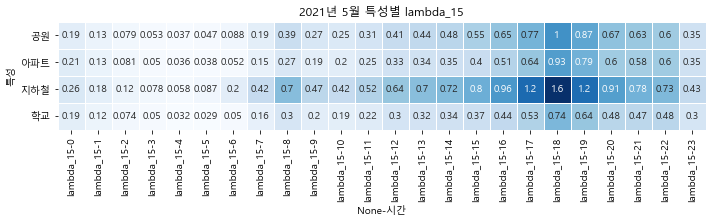

In [56]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_lambda, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 5월 특성별 lambda_15')
plt.tight_layout()
plt.show()

In [57]:
data_pivot_lambda_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['lambda_15'], aggfunc = 'std')
data_pivot_lambda_std.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.201692  0.128809  0.083982  0.061219  0.049418  0.099093  0.108188   
아파트  0.185765  0.109493  0.073740  0.051575  0.040123  0.052171  0.064550   
지하철  0.288338  0.178917  0.122880  0.082630  0.063465  0.108688  0.246847   
학교   0.179694  0.116759  0.086946  0.058020  0.043660  0.036834  0.071290   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.267221  0.453946  0.299672  0.236848  0.294731  0.363631  0.424016   
아파트  0.210284  0.421042  0.197822  0.178839  0.204598  0.291453  0.296658   
지하철  0.507695  0.773894  0.432741  0.374826  0.460034  0.567531  0.641678   
학교   0.170132  0.311519  0.214746  0.196881  0.184125  0.273778  0.293720   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.487111  0.584811  0.679864  0.713437  0.863822  0.757688  0.605281   
아파트  0.328841  0.381919  0.482037  0.559446  0.800376  0.655065  0.515765   
지하철  0.728851  0.911278  1.135490  1.363343  1.624671  1.349381  1.078520   
학교   0.330283  0.390058  0.477000  0.546308  0.729097  0.627828  0.450069   

                                   
시간         21        22        23  
특성                                 
공원   0.580126  0.557742  0.324744  
아파트  0.470361  0.494290  0.283595  
지하철  0.935101  0.843089  0.521880  
학교   0.450272  0.428451  0.276142

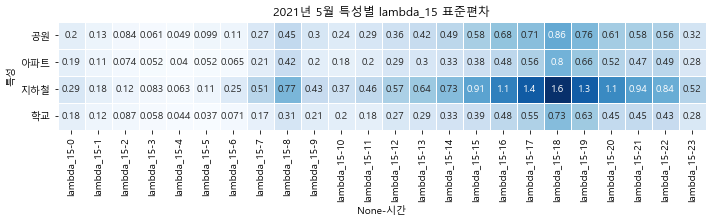

In [58]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_lambda_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 5월 특성별 lambda_15 표준편차')
plt.tight_layout()
plt.show()

In [59]:
data_pivot_mu = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['mu_15'])
data_pivot_mu.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.149160  0.086977  0.055319  0.034591  0.031458  0.060317  0.133231   
아파트  0.155510  0.096810  0.062803  0.042071  0.034649  0.069369  0.166893   
지하철  0.242485  0.150513  0.108376  0.070931  0.052474  0.057331  0.133193   
학교   0.133341  0.086500  0.055071  0.033252  0.029772  0.060373  0.117985   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.340176  0.471141  0.320048  0.313650  0.400493  0.466209  0.504732   
아파트  0.392378  0.490472  0.322474  0.302027  0.335177  0.396838  0.397017   
지하철  0.334036  0.677694  0.444391  0.405902  0.517889  0.635282  0.699139   
학교   0.271597  0.409744  0.274304  0.260053  0.293526  0.340312  0.361743   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.543388  0.610104  0.702013  0.803986  0.983271  0.704879  0.566849   
아파트  0.410684  0.438660  0.525442  0.617935  0.771375  0.586890  0.477662   
지하철  0.744648  0.840946  0.976998  1.251723  1.665909  1.196298  0.929894   
학교   0.389693  0.451281  0.539770  0.594841  0.648310  0.489063  0.399414   

                                   
시간         21        22        23  
특성                                 
공원   0.506732  0.441216  0.230672  
아파트  0.438160  0.398480  0.207893  
지하철  0.864846  0.730609  0.378776  
학교   0.384501  0.330921  0.195868

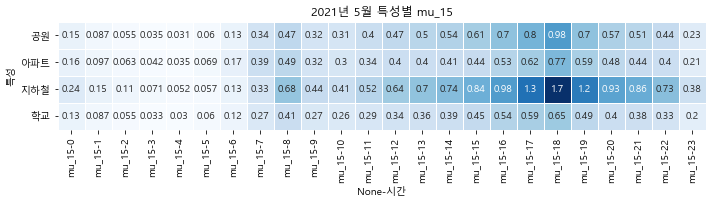

In [60]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_mu, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 5월 특성별 mu_15')
plt.tight_layout()
plt.show()

In [61]:
data_pivot_mu_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['mu_15'], aggfunc = 'std')
data_pivot_mu_std.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.130337  0.077563  0.053971  0.044907  0.043695  0.079957  0.152029   
아파트  0.129571  0.081460  0.061549  0.048299  0.048073  0.075904  0.147292   
지하철  0.293532  0.167718  0.121421  0.078747  0.061446  0.067077  0.130102   
학교   0.135758  0.087805  0.059265  0.036139  0.038339  0.072684  0.124493   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.329423  0.421161  0.240125  0.237834  0.314570  0.390306  0.454645   
아파트  0.329409  0.418940  0.244478  0.226273  0.267339  0.291977  0.291037   
지하철  0.342030  0.722775  0.377146  0.319351  0.412586  0.514287  0.614480   
학교   0.309326  0.371841  0.217229  0.197168  0.216403  0.254765  0.283560   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.504363  0.598592  0.652792  0.726446  0.838592  0.614507  0.474874   
아파트  0.313759  0.373525  0.430908  0.536871  0.673311  0.494096  0.400752   
지하철  0.723977  0.904419  1.080805  1.271675  1.646951  1.251180  0.989115   
학교   0.321851  0.406637  0.443121  0.532671  0.622067  0.480301  0.375046   

                                   
시간         21        22        23  
특성                                 
공원   0.443220  0.374205  0.195131  
아파트  0.388343  0.360059  0.175359  
지하철  0.950737  0.789483  0.489133  
학교   0.411742  0.346849  0.196369

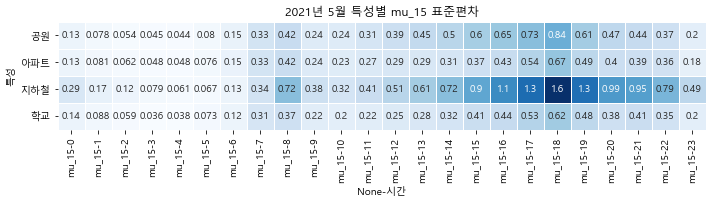

In [62]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_mu_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 5월 특성별 mu_15 표준편차')
plt.tight_layout()
plt.show()

In [63]:
data_pivot_rho = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['rho'])
data_pivot_rho.head()

rho                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   1.244834  1.567091  1.503987  1.303202  1.349146  1.531294  1.443186   
아파트  1.706396  1.626393  1.617484  1.905710  1.319519  0.870695  0.494060   
지하철  1.194857  1.386039  1.274131  1.233781  1.339213  2.186497  2.206875   
학교   1.772459  1.724346  1.412823  1.372967  1.197205  0.688294  0.724592   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.896675  1.229814  1.019755  0.828047  0.764216  0.853875  0.891099   
아파트  0.574525  0.704182  0.625818  0.669555  0.753553  0.816726  0.810395   
지하철  1.598792  1.203200  1.149717  1.086172  1.018686  1.012097  1.008114   
학교   1.264546  1.336341  1.360378  1.039762  0.758226  0.862188  0.889648   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.846523  0.893428  0.907747  0.963594  1.085599  1.259901  1.191919   
아파트  0.812887  0.880250  0.919142  1.042833  1.259325  1.359128  1.295848   
지하철  0.947098  0.935819  0.970015  0.975227  0.990261  1.033894  1.002660   
학교   0.875839  0.830072  0.788287  0.885833  1.182023  1.389574  1.249445   

                                   
시간         21        22        23  
특성                                 
공원   1.591991  1.553864  1.834726  
아파트  1.493353  1.828634  2.046942  
지하철  0.944421  1.067361  1.143120  
학교   1.474499  1.786354  1.892840

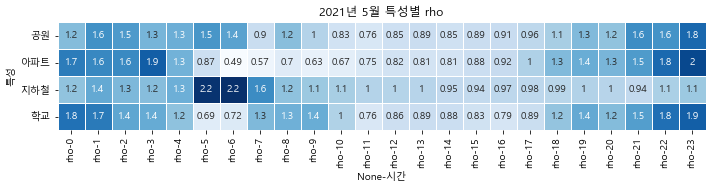

In [64]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_rho, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 5월 특성별 rho')
plt.tight_layout()
plt.show()

In [65]:
data_pivot_L_s = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['L_s'])
data_pivot_L_s.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   2.857260  3.012542  2.786121  2.481090  1.935070  1.486936  1.868840   
아파트  2.568087  2.517542  2.340411  2.177608  1.812439  0.992712  0.685503   
지하철  3.365923  3.889517  3.445354  3.614948  3.237130  4.152123  4.160041   
학교   1.950418  1.893658  1.768439  1.712458  1.212750  0.820763  0.778014   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   1.633740  2.036448  1.886771  1.661859  1.610957  1.904770  1.939157   
아파트  0.722150  0.984193  1.007831  1.113171  1.289635  1.538577  1.614689   
지하철  3.916573  3.571803  3.662150  3.543607  3.492310  3.497389  3.424810   
학교   1.092230  1.229385  1.078698  1.062132  1.116541  1.506006  1.380952   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   1.942246  2.040950  2.202230  2.441826  2.556952  2.917936  2.875140   
아파트  1.684405  1.781458  1.982572  2.120099  2.387219  2.592328  2.460944   
지하철  3.246442  3.261637  3.472102  3.506046  3.317082  3.588471  3.380018   
학교   1.411059  1.329065  1.391594  1.496236  1.828805  1.990449  1.885800   

                                   
시간         21        22        23  
특성                                 
공원   2.785486  2.970438  3.057982  
아파트  2.531601  2.695763  2.867121  
지하철  2.824549  3.301970  3.572273  
학교   1.792013  2.005906  2.067488

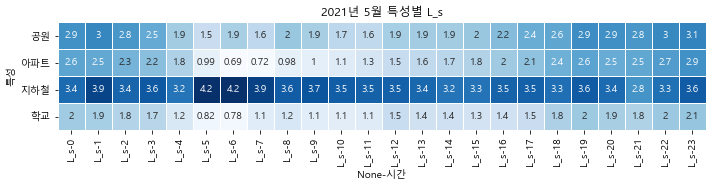

In [66]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_L_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 5월 특성별 L_s')
plt.tight_layout()
plt.show()

In [67]:
data_pivot_L_s_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['L_s'], aggfunc = 'std')
data_pivot_L_s_std.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   3.585860  3.680328  3.430074  3.315582  3.350443  3.030497  3.458746   
아파트  3.048027  2.967741  3.035725  3.122916  2.583159  1.609168  1.393504   
지하철  3.990530  4.694918  4.396720  5.921528  5.476438  7.275601  7.010865   
학교   2.276184  2.351471  2.343537  2.652979  2.035115  1.991388  1.699488   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   3.125829  3.408882  2.784232  2.267398  2.065113  1.849735  1.988531   
아파트  1.467951  1.685390  1.364751  1.277978  1.295518  1.706824  2.138063   
지하철  6.401014  6.093360  6.001713  5.360594  5.485253  5.232337  5.299956   
학교   2.060116  2.266018  1.838616  1.426509  1.247954  2.192396  1.925809   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   1.959435  2.119578  2.529805  2.837040  3.251728  3.140991  3.484588   
아파트  2.249243  2.114837  2.404320  2.527180  2.723309  2.875559  2.830187   
지하철  3.842083  4.387631  5.529868  5.520730  5.817679  6.395349  6.377792   
학교   1.712231  1.611705  2.103575  2.005742  2.401756  2.547961  2.318937   

                                   
시간         21        22        23  
특성                                 
공원   3.216003  3.393269  3.404956  
아파트  2.790047  3.007956  3.125065  
지하철  5.702999  6.269233  5.014299  
학교   1.930554  2.288567  2.394410

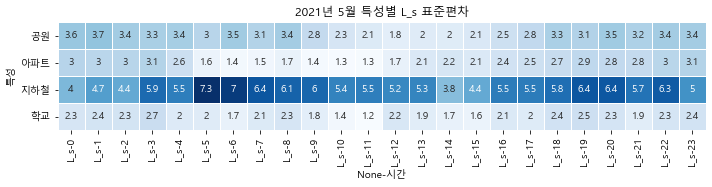

In [68]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_L_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 5월 특성별 L_s 표준편차')
plt.tight_layout()
plt.show()

In [69]:
data_pivot_W_s = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['W_s'])
data_pivot_W_s.head()

W_s                                                            \
시간          0          1          2           3           4           5    
특성                                                                         
공원   21.971385  44.550068  93.288286   77.596524   95.621638   61.722422   
아파트  21.026927  35.521540  55.349999  103.382074   98.902716   39.009965   
지하철  26.513711  49.238500  61.168828   91.738229  118.677230  127.744041   
학교   22.078927  34.377593  47.117661   68.680823   62.534183   39.517176   

                                                                               \
시간          6          7         8          9          10        11        12   
특성                                                                              
공원   47.340712  12.509383  7.434889   9.555533   7.869148  6.236128  5.550470   
아파트  13.994966   5.516603  4.545271   5.582711   6.162521  5.674053  4.918493   
지하철  53.922236  20.521804  8.522419  10.594955  10.369937  8.042566  6.185467   
학교   27.263562  14.696075  8.708307   9.170605   7.489623  5.621406  5.231290   

                                                                           \
시간         13        14        15        16        17        18        19   
특성                                                                          
공원   5.156755  4.777514  4.466138  3.960695  3.760795  3.208813  4.633760   
아파트  4.958512  4.879856  4.965061  4.136987  3.753429  3.278463  4.213540   
지하철  5.691608  5.285249  4.714737  4.252332  3.263666  2.518496  3.564961   
학교   4.853837  4.557302  3.898959  3.222170  3.170102  3.280650  4.422803   

                                              
시간         20        21        22         23  
특성                                            
공원   5.745831  6.953539  8.393145  17.184868  
아파트  5.138901  6.661241  7.470391  14.453153  
지하철  4.568121  4.829539  6.811439  14.015846  
학교   5.203865  6.089398  7.902967  15.960715

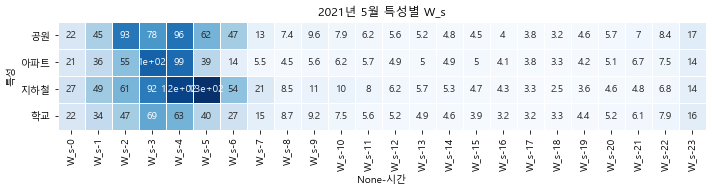

In [70]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_W_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 5월 특성별 W_s')
plt.tight_layout()
plt.show()

In [71]:
data_pivot_W_s_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['W_s'], aggfunc = 'std')
data_pivot_W_s_std.head()

W_s                                                             \
시간          0          1           2           3           4           5    
특성                                                                          
공원   17.938502  51.603451  220.607900   91.321278  187.758771  137.396805   
아파트  23.403746  51.684728   68.799442  176.779784  159.919491   74.024533   
지하철  46.136172  88.368250  105.171640  133.308959  198.746554  201.489043   
학교   23.816282  67.823016   80.935703  118.498350  112.943539   84.623900   

                                                                      \
시간          6          7          8          9          10        11   
특성                                                                     
공원   92.604384  19.163005   9.309158  10.952620   6.291895  5.034554   
아파트  27.784001   8.868634   7.527649   5.371546   5.491741  4.467657   
지하철  75.870688  25.505696  10.386468   9.558420   6.754550  7.338677   
학교   65.772549  36.505334  18.111664  21.856210  11.452612  3.783736   

                                                                           \
시간         12        13        14        15        16        17        18   
특성                                                                          
공원   3.141698  2.852498  2.459332  2.569445  2.204394  2.346767  2.074226   
아파트  3.332097  3.480658  3.441418  3.654731  2.801654  2.455709  2.278748   
지하철  3.130502  3.015768  2.378051  2.006143  2.028110  1.574481  1.378925   
학교   3.458822  3.124193  2.870549  2.426867  1.992324  2.044098  2.316137   

                                                         
시간         19        20        21         22         23  
특성                                                       
공원   2.627196  3.632828  6.366328   6.641863  19.016817  
아파트  2.712808  3.414150  6.709568   6.436108  12.323893  
지하철  1.621338  2.421890  3.376393  10.759187  16.711878  
학교   2.977674  3.311683  5.135832   6.346693  22.807906

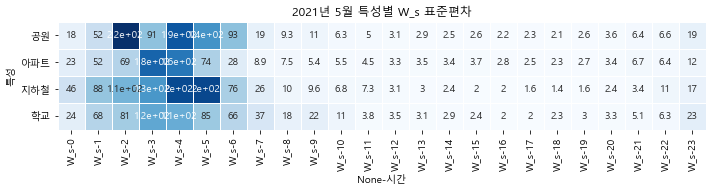

In [72]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_W_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 5월 특성별 W_s 표준편차')
plt.tight_layout()
plt.show()